# Load Libraries

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import split_folders

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load Dataset

Load dataset from my drive and extract them

In [6]:
!unrar x "/content/drive/My Drive/rps-cv-images.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/rps-cv-images.rar

Creating    rps-cv-images                                             OK
Creating    rps-cv-images/paper                                       OK
Extracting  rps-cv-images/paper/04l5I8TqdzF9WDMJ.png                       0%  OK 
Extracting  rps-cv-images/paper/0a3UtNzl5Ll3sq8K.png                       0%  OK 
Extracting  rps-cv-images/paper/0cb6cVL8pkfi4wF6.png                       0%  OK 
Extracting  rps-cv-images/paper/0eqArS2GgsBeqgSn.png                       0%  OK 
Extracting  rps-cv-images/paper/0Og76sl5CJhbxWWx.png                       0%  OK 
Extracting  rps-cv-images/paper/0RA9rcrv8iVvuDDU.png                       0%  OK 
Extracting  rps-cv-images/paper/0t08v9bAaA0mXGCQ.png                       0%  OK 
Extracting  rps-cv-images/paper/0Uomd0HvOB33m47I.png                       0%

In [7]:
os.listdir('/content/rps-cv-images')

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

# Spliting Dataset

Split the dataset with 80% data train and 20% data validation

In [8]:
split_folders.ratio('/content/rps-cv-images', output="/content/rps", ratio=(.8, .2), seed=123)

Copying files: 2188 files [00:00, 3363.44 files/s]


In [9]:
print(f"Train rock: {len(os.listdir('/content/rps/train/rock'))}") 
print(f"Train paper: {len(os.listdir('/content/rps/train/paper'))}")
print(f"Train scissors: {len(os.listdir('/content/rps/train/scissors'))}")

print(f"Validation rock: {len(os.listdir('/content/rps/val/rock'))}") 
print(f"Validation paper: {len(os.listdir('/content/rps/val/paper'))}")
print(f"Validation scissors: {len(os.listdir('/content/rps/val/scissors'))}")

Train rock: 580
Train paper: 569
Train scissors: 600
Validation rock: 146
Validation paper: 143
Validation scissors: 150


# Show Images

Create directory for data train and data validation, and check image from that directory

In [0]:
data_dir = '/content/rps'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

rock_imgs = os.listdir(os.path.join(train_dir, 'rock'))
paper_imgs = os.listdir(os.path.join(train_dir, 'paper'))
scissors_imgs = os.listdir(os.path.join(train_dir, 'scissors'))

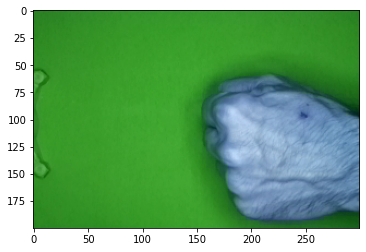

In [11]:
for img in rock_imgs:
  img_array = cv2.imread(os.path.join(os.path.join(train_dir, 'rock'),img))
  plt.imshow(img_array)
  break

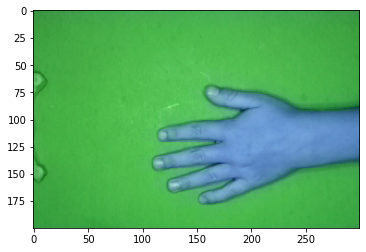

In [12]:
for img in paper_imgs:
  img_array = cv2.imread(os.path.join(os.path.join(train_dir, 'paper'),img))
  plt.imshow(img_array)
  break

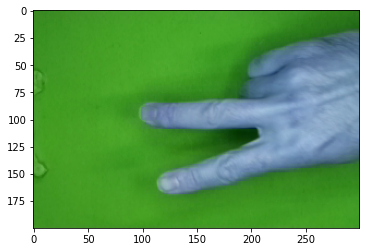

In [13]:
for img in scissors_imgs:
  img_array = cv2.imread(os.path.join(os.path.join(train_dir, 'scissors'),img))
  plt.imshow(img_array)
  break

# Augmentation using Data Generator

- Create object used ```ImageDataGenerator``` for data train and data validation

In [0]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   rotation_range= 20, 
                                   horizontal_flip=True,
                                   shear_range = 0.2,
                                   zoom_range= 0.2, 
                                   fill_mode = 'nearest'
                                   )

val_datagen = ImageDataGenerator(rescale= 1./255,
                                   rotation_range= 20, 
                                   horizontal_flip=True,
                                   shear_range = 0.2,
                                   zoom_range= 0.2, 
                                   fill_mode = 'nearest'
                                   )

In [27]:
train_generator = train_datagen.flow_from_directory(
            train_dir,  # direktori data train
            target_size=(100,100), # mengubah resolusi gambar menjadi 100x100 piksel
            batch_size=32, 
            class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
            val_dir, 
            target_size=(100,100), 
            batch_size=32, 
            class_mode='categorical')
train_generator.class_indices

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


{'paper': 0, 'rock': 1, 'scissors': 2}

label 0 indicate as paper, 1 as rock, and 2 as scissors

# Model Sequential

Create CNN arsitecture using ```Sequential```, add 2 layers of convolution use Conv2D and reduce image by MaxPool2d

In [28]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu',input_shape=(100, 100, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)      

# Compile Model

Compile model and define loss function and optimizer

In [0]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',  
    metrics = ['accuracy'])

In [31]:
model_fit = model.fit(train_generator,
          steps_per_epoch= 32,
          epochs=10,
          validation_data=val_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/10
32/32 - 22s - loss: 0.2849 - accuracy: 0.8857 - val_loss: 0.2249 - val_accuracy: 0.9438
Epoch 2/10
32/32 - 22s - loss: 0.2717 - accuracy: 0.8973 - val_loss: 0.2599 - val_accuracy: 0.9125
Epoch 3/10
32/32 - 22s - loss: 0.2890 - accuracy: 0.8845 - val_loss: 0.1755 - val_accuracy: 0.9625
Epoch 4/10
32/32 - 22s - loss: 0.2527 - accuracy: 0.9102 - val_loss: 0.2629 - val_accuracy: 0.9312
Epoch 5/10
32/32 - 22s - loss: 0.2245 - accuracy: 0.9141 - val_loss: 0.2656 - val_accuracy: 0.9000
Epoch 6/10
32/32 - 22s - loss: 0.1931 - accuracy: 0.9375 - val_loss: 0.1541 - val_accuracy: 0.9500
Epoch 7/10
32/32 - 22s - loss: 0.2122 - accuracy: 0.9316 - val_loss: 0.2180 - val_accuracy: 0.9563
Epoch 8/10
32/32 - 22s - loss: 0.1927 - accuracy: 0.9346 - val_loss: 0.1635 - val_accuracy: 0.9563
Epoch 9/10
32/32 - 22s - loss: 0.1554 - accuracy: 0.9506 - val_loss: 0.0927 - val_accuracy: 0.9812
Epoch 10/10
32/32 - 25s - loss: 0.1716 - accuracy: 0.9414 - val_loss: 0.1247 - val_accuracy: 0.9812


# Scoring Model

__Table Report__

In [32]:
loss_train,acc_train = model.evaluate(train_generator)
loss_val,acc_val = model.evaluate(val_generator)

report = pd.DataFrame({'Score':['Train','Validasi'],
                       'Loss':[loss_train,loss_val],
                       'Accuracy':[acc_train,acc_val]})
report

14/14 [==============================] - 3s 238ms/step - loss: 0.1255 - accuracy: 0.9658


,Score,Loss,Accuracy
0,Train,0.122959,0.966838
1,Validasi,0.125490,0.965831


There is good accuracy (96%) from this model

__Grafik Report__

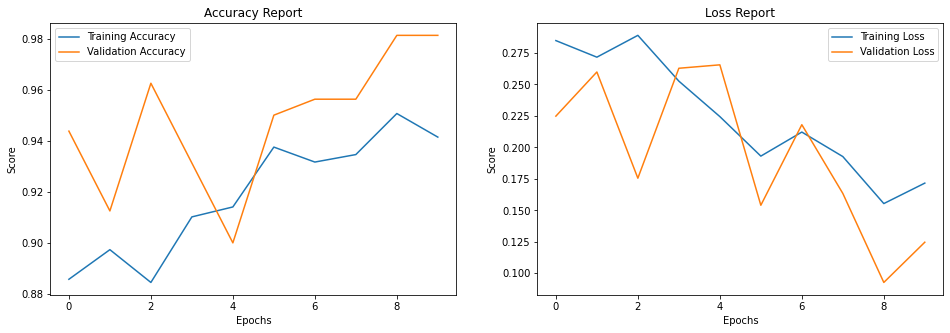

In [33]:
epochs = range(10)

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.plot(epochs, model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Accuracy Report')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_fit.history['loss'], label='Training Loss')
plt.plot(epochs, model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Loss Report')
plt.legend()

plt.show()

# Test Model

Test model by upload image from local folder

Using TensorFlow backend.


Saving 1lEpWTJDphkm3HdC.png to 1lEpWTJDphkm3HdC.png
[[0. 0. 1.]]
Scissors


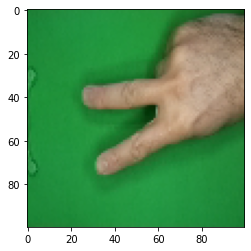

In [34]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  if classes[0,0] == 1:
    print(classes)
    print('Paper')
  elif classes[0,1] == 1:
    print(classes)
    print('Rock')
  else:
    print(classes)
    print('Scissors')